In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings

In [126]:
df_machine = pd.read_pickle('df_machine.pkl')

In [128]:
def elbow_method(df):
    """
    This function calculate the sum of squared distances for each k value and plots graph
    :arg:
        df: dataframe with all the data.
    :returns:
        The function does not have a return. It saves the plot inside the plots folder.
    """
    k_values = list(range(2, 19))
    sse = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        
        #Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=sse, mode='lines+markers'))
    fig.update_layout(
        title='Elbow Method',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Sum of Squared Distances'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [131]:
elbow_method(df_machine)

In [120]:
def silhouette_plot(df):
    """
    Generate an interactive line chart of Silhouette Coefficient vs. Number of Clusters using Plotly.

    :Args:
    df: (pandas DataFrame): The input data.
    """
    k_values = list(range(2, 19))
    silhouette_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

        # Calculate the Silhouette Coefficient for the clustering result
        silhouette_coefficient = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_coefficient)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=k_values, y=silhouette_scores, mode='lines+markers'))
    fig.update_layout(
        title='Silhouette Coefficient vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Silhouette Coefficient'),
        showlegend=False,
        template='plotly_white'
    )

    # Display the chart
    fig.show()

In [130]:
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Call silhouette_plot with df_machine
silhouette_plot(df_machine)

In [122]:
def davies_boulding_plot(df):
    """
    Generate an interactive line chart of Davies-Bouldin Index vs. Number of Clusters using Plotly.
    :Args:
    df (pandas DataFrame): The input data.
    """
    
    k_values = list(range(2, 19))
    davies_bouldin_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

#Calculate the Davies-Bouldin Index for the clustering result
        davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
        davies_bouldin_scores.append(davies_bouldin_index)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=davies_bouldin_scores, mode='lines+markers'))
    fig.update_layout(
        title='Davies-Bouldin Index vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (K)'),
        yaxis=dict(title='Davies-Bouldin Index'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [132]:
davies_boulding_plot(df_machine)

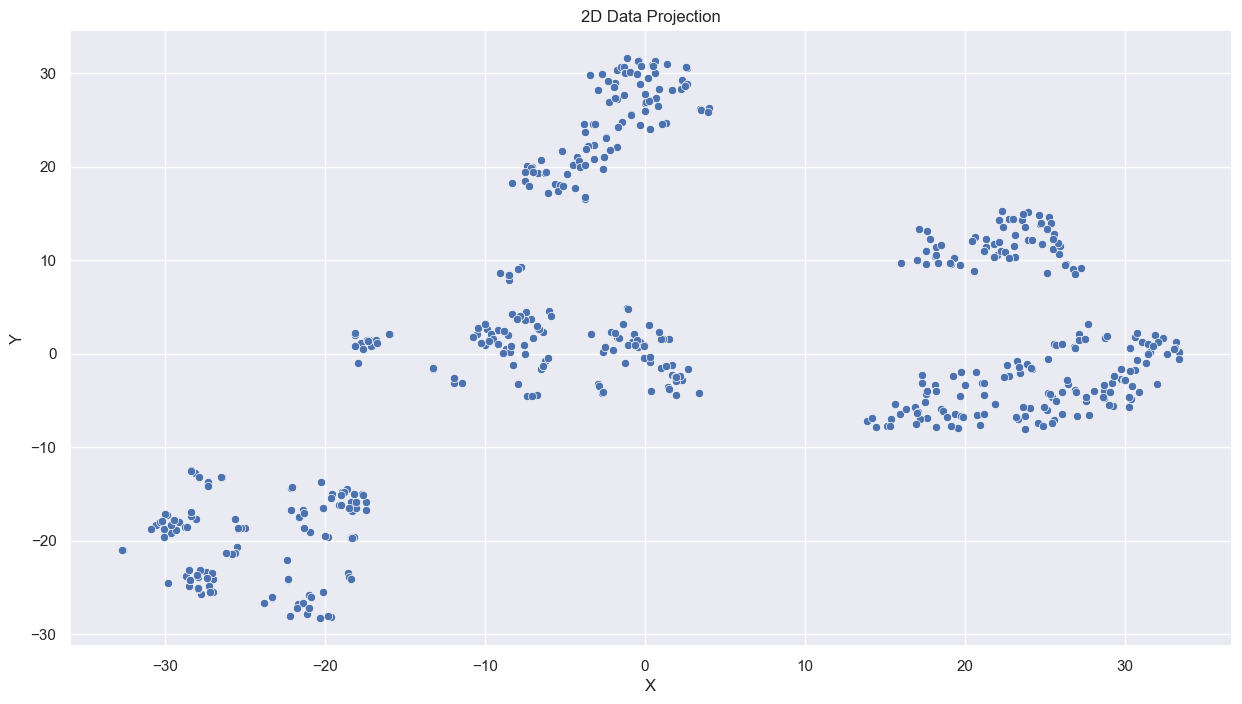

In [134]:
#Instantiating TSNE
tsne = TSNE(n_components=2, random_state=42)


tsne_df = pd.DataFrame(tsne.fit_transform(df_machine), columns = ['X', 'Y'] )

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x= 'X', y= 'Y',data= tsne_df).set(title= '2D Data Projection');

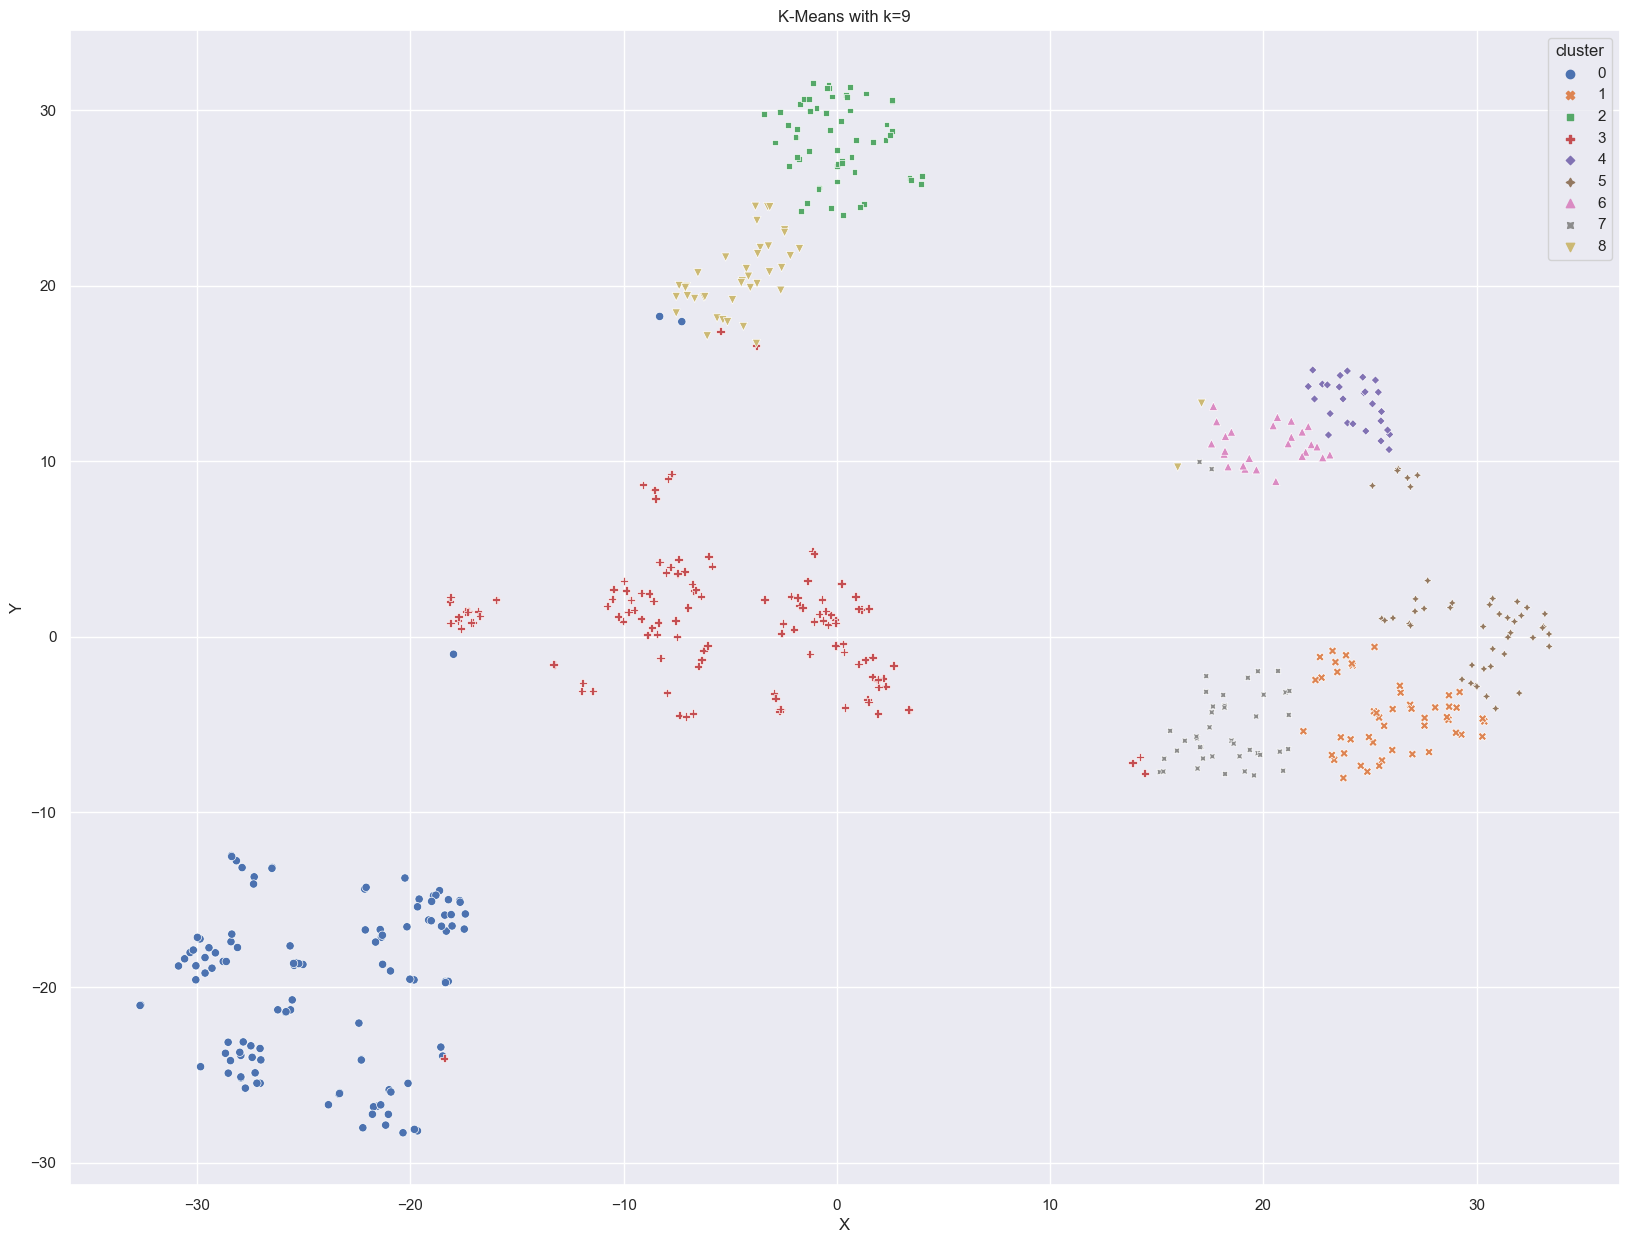

In [142]:
km = KMeans(n_clusters = 9).fit(df_machine)
tsne_df['cluster'] = pd.Categorical(km.labels_)

sns.set(rc = {'figure.figsize':(20,15)})
sns.scatterplot(x='X', y='Y', hue='cluster', style='cluster', data= tsne_df).set(title= 'K-Means with k=9');

In [143]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Ejecutar el algoritmo K-Means con n_init explícito
kmeans = KMeans(n_clusters=7, n_init=10).fit(df_machine)

# Agregar las etiquetas de clúster al DataFrame tsne_df
tsne_df['cluster'] = pd.Categorical(kmeans.labels_)

# Crear un diccionario para almacenar los DataFrames de cada clúster
cluster_dataframes = {}

# Iterar sobre cada clúster y crear el DataFrame correspondiente
for cluster in range(9):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_dataframes[cluster] = df_machine.iloc[cluster_indices]

# Acceder a un DataFrame específico de un clúster
cluster_0_df = cluster_dataframes[0]

In [144]:
cluster_0_df

,HORAS DE CONTRATO,Categoría,Número de hijos,Sexo,Supervisora/Coordinador,Sección,IT/AT,Horas contratadas,TIPO DE BAJA,Evaluación,Supervisor/a,CATEGORIA,SECCIÓN,TIENDA/SECCION INICIAL,SECCIÓN2,TIENDA/SECCION FINAL2,QUIEN CAUSO BAJA?,FECHA BAJA CATEGORY,Nº DE DIAS CATEGORY
ID,,,,,,,,,,,,,,,,,,,
4656M,1,5,2,2,16,1,2.0,1.0,2.0,1.0,6.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
0010X,1,5,2,2,16,1,1.0,1.0,2.0,1.0,6.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
0606X,1,5,2,2,16,1,3.0,1.0,1.0,1.0,6.0,7.0,3.0,73.0,1.0,1.0,1.0,2.0,0.0
7666X,1,5,2,2,16,1,1.0,1.0,2.0,1.0,1.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
8926V,1,5,2,2,16,1,1.0,1.0,2.0,3.0,5.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588D,1,3,7,1,23,1,1.0,1.0,3.0,1.0,9.0,1.0,3.0,88.0,1.0,1.0,1.0,2.0,0.0
7254D,2,3,7,1,30,1,2.0,2.0,1.0,1.0,12.0,1.0,3.0,74.0,1.0,1.0,1.0,2.0,0.0
8565M,2,3,7,1,30,1,1.0,1.0,2.0,1.0,12.0,1.0,3.0,73.0,1.0,1.0,1.0,2.0,0.0


In [145]:
value_counts_dict = {}
for column in cluster_0_df.columns:
    value_counts_dict[column] = cluster_0_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     68
1     67
6      5
11     2
15     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    121
5     17
4      4
2      1
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
2     67
7     47
3      8
9      8
8      7
1      2
10     2
6      1
5      1
Name: count, dtype: int64

Column: Sexo
Sexo
1    123
2     20
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
19    48
21    36
30    12
23    11
17     9
18     8
16     6
29     4
26     3
24     2
22     1
25     1
31     1
20     1
Name: count, dtype: int64

Column: Sección
Sección
1    142
2      1
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    126
2.0      9
3.0      8
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
1.0    99
2.0    40
3.0     4
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    96
3.0    26
1.0    20
4.0     1
Name: count, dtype: int64

Column: Evaluación
Eva